# Get To Know Me

This project is meant to uncover my taste in music and how it changes (given I have data of two barely overlapping periods).
I often think that truth about facts is complex and can't be explained easily. Data Science offers a way to go deeper in order
to find answers to ours questions, sometimes confirming our intuitions and sometimes completely disproving them. 

There are three main goals in this project:

- Gather insights about myself and my tastes. 
- Create clusters of similar songs (like an unofficial genre).
- Put into use skills such as data cleaning, data visualization, statistics, and machine learning using clusters. 


On a more personal note I hope this can be used by my friends in order to analyze their music as well without having to wait
for the yearly Spotify Wrapped. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

songs = pd.read_csv('output/final.csv', index_col = 0)
songs.head(10)

,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,albumName,albumID
0,Tamborito - Gramophiles Edit___Gramophiles,2020-03-30 18:45,Gramophiles,Tamborito - Gramophiles Edit,200273,2020-03-30 18:45:00,0.733,0.908,2,-3.303,...,105.052,audio_features,1LbfvacbAwzIli4Jyd4vNx,spotify:track:1LbfvacbAwzIli4Jyd4vNx,https://api.spotify.com/v1/tracks/1LbfvacbAwzI...,https://api.spotify.com/v1/audio-analysis/1Lbf...,226857,4,Tamborito (Gramophiles Edit),1c3VDWurS8nwHh0ZIZjXTR
1,Os Cafezais Sem Fim___Nelson Faria,2020-03-31 11:42,Nelson Faria,Os Cafezais Sem Fim,230874,2020-03-31 11:42:00,0.432,0.307,7,-13.805,...,121.541,audio_features,5UmZFRpnB9pPVi59MTadEL,spotify:track:5UmZFRpnB9pPVi59MTadEL,https://api.spotify.com/v1/tracks/5UmZFRpnB9pP...,https://api.spotify.com/v1/audio-analysis/5UmZ...,230875,4,Nelson Faria Convida Wagner Tiso. Um Café Lá E...,5e5hxV3j1vCXtYo3xbNVKK
2,Ay Que Sera Del Sol - Original___Rodrigo Gallardo,2020-03-31 11:49,Rodrigo Gallardo,Ay Que Sera Del Sol - Original,390222,2020-03-31 11:49:00,0.773,0.532,2,-11.297,...,99.993,audio_features,2mDpaQWRfsXtymj7JhVOEE,spotify:track:2mDpaQWRfsXtymj7JhVOEE,https://api.spotify.com/v1/tracks/2mDpaQWRfsXt...,https://api.spotify.com/v1/audio-analysis/2mDp...,390223,4,Summer Sol,6iEbxNzIjuMk3oFWveulAn
3,Fool___Iorie,2020-03-31 11:51,Iorie,Fool,128739,2020-03-31 11:51:00,0.706,0.604,2,-6.932,...,82.030,audio_features,4VEEDnEFLI9dUy5QA51rom,spotify:track:4VEEDnEFLI9dUy5QA51rom,https://api.spotify.com/v1/tracks/4VEEDnEFLI9d...,https://api.spotify.com/v1/audio-analysis/4VEE...,165029,4,fools (can't help falling in love) (feat. Sody),4mNmrwxha3NNfEyciju5wc
4,Ay Que Sera Del Sol - Original___Rodrigo Gallardo,2020-03-31 11:52,Rodrigo Gallardo,Ay Que Sera Del Sol - Original,71285,2020-03-31 11:52:00,0.773,0.532,2,-11.297,...,99.993,audio_features,2mDpaQWRfsXtymj7JhVOEE,spotify:track:2mDpaQWRfsXtymj7JhVOEE,https://api.spotify.com/v1/tracks/2mDpaQWRfsXt...,https://api.spotify.com/v1/audio-analysis/2mDp...,390223,4,Summer Sol,6iEbxNzIjuMk3oFWveulAn
5,Diverso___Le Feste Antonacci,2020-03-31 11:57,Le Feste Antonacci,Diverso,313026,2020-03-31 11:57:00,0.724,0.537,2,-5.776,...,82.986,audio_features,4oH9apDmWlL3OawBhz9mVD,spotify:track:4oH9apDmWlL3OawBhz9mVD,https://api.spotify.com/v1/tracks/4oH9apDmWlL3...,https://api.spotify.com/v1/audio-analysis/4oH9...,313027,4,Diverso,4aFlXyP5fArNkEAwOP3FiV
6,Retrobanana (Alligatorz Remix)___Alligatorz,2020-03-31 12:01,Alligatorz,Retrobanana (Alligatorz Remix),193470,2020-03-31 12:01:00,0.668,0.897,3,-8.117,...,103.024,audio_features,7MBJJQW9qGkOJkbxxuHTGr,spotify:track:7MBJJQW9qGkOJkbxxuHTGr,https://api.spotify.com/v1/tracks/7MBJJQW9qGkO...,https://api.spotify.com/v1/audio-analysis/7MBJ...,193471,4,Retrobanana (Alligatorz Remix),3dOPFI5VLTe5ZlY1SikMeh
7,Come Home - Instrumental___Anderson .Paak,2020-03-31 12:05,Anderson .Paak,Come Home - Instrumental,266440,2020-03-31 12:05:00,0.616,0.724,0,-6.213,...,164.369,audio_features,7peGLxhD3Has6ajBPQrttk,spotify:track:7peGLxhD3Has6ajBPQrttk,https://api.spotify.com/v1/tracks/7peGLxhD3Has...,https://api.spotify.com/v1/audio-analysis/7peG...,266440,4,Ventura (Instrumentals),4a6u9TUkH1MW2zZkFUYlV0
8,Sofrito___Mongo Santamaria,2020-03-31 12:11,Mongo Santamaria,Sofrito,366200,2020-03-31 12:11:00,0.644,0.519,10,-8.895,...,117.739,audio_features,0FpBO0Pyoh4MZVmNO3zwnc,spotify:track:0FpBO0Pyoh4MZVmNO3zwnc,https://api.spotify.com/v1/tracks/0FpBO0Pyoh4M...,https://api.spotify.com/v1/audio-analysis/0FpB...,366200,4,Sofrito,6o663c9rSwfKOoLQKs76kS
9,La Carta___NAFTA,2020-03-31 12:15,NAFTA,La Carta,253161,2020-03-31 12:15:00,0.447,0.625,3,-8.053,...,85.129,audio_features,3yaKfdw6Hd2LX6zmTXVPsK,spotify:track:3yaKfdw6Hd2LX6zmTXVPsK,https://api.spotify.com/v1/tracks/3yaKfdw6Hd2L...,https://api.spotify.com/v1/audio-analysis/3yaK...,149547,4,La Carta,0eCzXxS9SNjvAIt6ahggiY


# Explore the dataset a little bit...

In [2]:
songs.describe()

,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.626800e+04,16268.000000,16268.000000,16268.000000,16268.000000,16268.000000,16268.000000,16268.000000,16268.000000,16268.000000,16268.000000,16268.000000,1.626800e+04,16268.000000
mean,1.959404e+05,0.700990,0.582568,5.511003,-9.428598,0.482481,0.083662,0.322734,0.309148,0.170459,0.527783,117.543456,2.775818e+05,3.936624
std,1.486064e+05,0.141464,0.194400,3.584930,3.455078,0.499708,0.079587,0.300564,0.360434,0.152923,0.256572,25.771884,1.010828e+05,0.307451
min,0.000000e+00,0.000000,0.000229,0.000000,-40.262000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,2.353400e+04,0.000000
25%,4.193325e+04,0.628000,0.450000,2.000000,-11.129000,0.000000,0.040900,0.046600,0.000113,0.090500,0.323750,98.006500,2.082150e+05,4.000000
50%,2.095945e+05,0.725000,0.590000,6.000000,-9.038000,0.000000,0.054700,0.226000,0.069150,0.111000,0.539000,117.016500,2.513330e+05,4.000000
75%,2.875800e+05,0.804000,0.728000,9.000000,-7.202000,1.000000,0.090425,0.558250,0.709000,0.177000,0.738000,127.014000,3.385470e+05,4.000000
max,5.103165e+06,0.988000,1.000000,11.000000,-1.148000,1.000000,0.958000,0.996000,0.994000,0.986000,0.984000,215.523000,1.412451e+06,5.000000


We can observe that the columns have different means and scales. Therefore further down the line, using a scaler would come in handy. 

In [3]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16268 entries, 0 to 16267
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16268 non-null  object 
 1   endTime           16268 non-null  object 
 2   artistName        16268 non-null  object 
 3   trackName         16268 non-null  object 
 4   msPlayed          16268 non-null  int64  
 5   datetime          16268 non-null  object 
 6   danceability      16268 non-null  float64
 7   energy            16268 non-null  float64
 8   key               16268 non-null  int64  
 9   loudness          16268 non-null  float64
 10  mode              16268 non-null  int64  
 11  speechiness       16268 non-null  float64
 12  acousticness      16268 non-null  float64
 13  instrumentalness  16268 non-null  float64
 14  liveness          16268 non-null  float64
 15  valence           16268 non-null  float64
 16  tempo             16268 non-null  float6

From the type of each variable, we can come back here when we will handle data from each of these in case we have to change format or type. For example, if we want months, days or mins we would convert the datetime column to be a *datetime* object. 

In [4]:
songs.isna().sum()

name                0
endTime             0
artistName          0
trackName           0
msPlayed            0
datetime            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
albumName           0
albumID             0
dtype: int64

In [5]:
songs.loc[:,'name'][0:3]

0           Tamborito - Gramophiles Edit___Gramophiles
1                   Os Cafezais Sem Fim___Nelson Faria
2    Ay Que Sera Del Sol - Original___Rodrigo Gallardo
Name: name, dtype: object

In [6]:
songs.loc[:, 'trackName'][0:3]

0      Tamborito - Gramophiles Edit
1               Os Cafezais Sem Fim
2    Ay Que Sera Del Sol - Original
Name: trackName, dtype: object

There are certain columns that can be dropped immediately like:

 - analysis_url
 - track_href
 - uri
 - name (same as trackName but more difficult to parse later on)
 - endTime (same as datetime but datetime has a more confortable format)
 - album id (as we already have album name)
 - type
 - id

## Dropping unnecessary variables

In [7]:
songs = songs.drop(['analysis_url', 'track_href', 'uri', 'name', 'endTime', 'albumID', 'id', 'type'], axis=1)
songs.head()

,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,albumName
0,Gramophiles,Tamborito - Gramophiles Edit,200273,2020-03-30 18:45:00,0.733,0.908,2,-3.303,1,0.1090,0.01490,0.00913,0.2090,0.501,105.052,226857,4,Tamborito (Gramophiles Edit)
1,Nelson Faria,Os Cafezais Sem Fim,230874,2020-03-31 11:42:00,0.432,0.307,7,-13.805,0,0.0376,0.90200,0.86800,0.1770,0.370,121.541,230875,4,Nelson Faria Convida Wagner Tiso. Um Café Lá E...
2,Rodrigo Gallardo,Ay Que Sera Del Sol - Original,390222,2020-03-31 11:49:00,0.773,0.532,2,-11.297,1,0.0674,0.00278,0.86000,0.0449,0.389,99.993,390223,4,Summer Sol
3,Iorie,Fool,128739,2020-03-31 11:51:00,0.706,0.604,2,-6.932,1,0.3030,0.41800,0.00000,0.2420,0.361,82.030,165029,4,fools (can't help falling in love) (feat. Sody)
4,Rodrigo Gallardo,Ay Que Sera Del Sol - Original,71285,2020-03-31 11:52:00,0.773,0.532,2,-11.297,1,0.0674,0.00278,0.86000,0.0449,0.389,99.993,390223,4,Summer Sol


## Statistical description of the numeric variables

Let's see some descriptive statistics about my streamings:

In [8]:
print("The number of streamings is: ",len(songs))
print("The amount of artists withing these streamings is: ",len(songs.groupby('artistName')))
print("The amount of unique songs listened was: ",len(songs.groupby('trackName')))
print("The starting date is: {} \nThe ending date is: {}".format(songs['datetime'].min(), songs['datetime'].max()))

The number of streamings is:  16268
The amount of artists withing these streamings is:  2527
The amount of unique songs listened was:  5327
The starting date is: 2020-03-30 18:45:00 
The ending date is: 2021-03-31 22:40:00


In [9]:
songs.columns

Index(['artistName', 'trackName', 'msPlayed', 'datetime', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'albumName'],
      dtype='object')

## Creating new variables with seconds instead of milliseconds

In order to make it more legible, the columns with miliseconds will be transformed to seconds:

In [10]:
songs['secPlayed'] = songs['msPlayed'] / 1000
songs['duration_s'] = songs['duration_ms'] / 1000
songs.head(1)

,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,albumName,secPlayed,duration_s
0,Gramophiles,Tamborito - Gramophiles Edit,200273,2020-03-30 18:45:00,0.733,0.908,2,-3.303,1,0.109,0.0149,0.00913,0.209,0.501,105.052,226857,4,Tamborito (Gramophiles Edit),200.273,226.857


## Outlier analysis

Usually what I listen to for a short amount of time is not intentional, will therefore find the right threshold of time:

In [12]:
print("The amount of streaming I heard for under 60 seconds: ",len(songs[songs['secPlayed'] < 60]))
print(f"This represents a {round(len(songs[songs['secPlayed'] < 60])/len(songs), 3)*100}% of the total streaming history")


The amount of streaming I heard for under 60 seconds:  4332
This represents a 26.6% of the total streaming history


Will do a manual deep dive to understand if these songs are outliers or not:

In [13]:
songs[songs['secPlayed'] <= 60]['secPlayed'].mean()

11.394329178208679

<AxesSubplot:xlabel='secPlayed', ylabel='Density'>

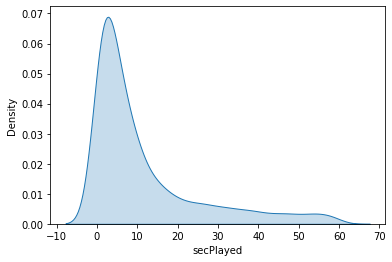

In [14]:
less_than_60 = songs[songs['secPlayed'] <= 60]['secPlayed']
sns.kdeplot(less_than_60, fill=True)

In [15]:
songs[songs['secPlayed'] == 0]

,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,albumName,secPlayed,duration_s
42,Anderson .Paak,Come Home - Instrumental,0,2020-03-31 17:57:00,0.616,0.724,0,-6.213,0,0.0569,0.00305,0.700000,0.1420,0.256,164.369,266440,4,Ventura (Instrumentals),0.0,266.440
45,NAFTA,La Carta,0,2020-03-31 18:04:00,0.447,0.625,3,-8.053,1,0.3330,0.90200,0.000000,0.1080,0.864,85.129,149547,4,La Carta,0.0,149.547
127,Pj Sin Suela,Por Ti,0,2020-04-02 00:48:00,0.661,0.628,7,-7.182,1,0.0284,0.00166,0.009160,0.1150,0.455,137.969,216333,4,¡La Primavera Llegó!,0.0,216.333
128,Pj Sin Suela,La Pelúa Remix,0,2020-04-02 00:48:00,0.670,0.808,7,-5.467,0,0.0734,0.00562,0.000001,0.0596,0.798,89.918,257347,4,La Pelúa Remix,0.0,257.347
193,Lewis OfMan,Attitude,0,2020-04-03 15:49:00,0.785,0.678,11,-7.253,0,0.0506,0.01380,0.033100,0.0509,0.387,101.016,185120,4,Attitude,0.0,185.120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14821,Sophie Lloyd,"Calling Out (feat. Dames Brown) - 12"" Mix",0,2021-02-12 09:59:00,0.795,0.598,7,-7.403,0,0.0656,0.05950,0.187000,0.6840,0.567,121.982,477881,4,"Calling Out (feat. Dames Brown) [12"" Mix]",0.0,477.881
15075,Patiño Quintana,Camino De Aire (Parte III),0,2021-02-21 13:30:00,0.437,0.253,9,-10.603,0,0.0581,0.75300,0.002410,0.1880,0.168,109.996,242253,4,Camino De Aire,0.0,242.253
15169,Bantu Clan,Africa Ni Leo - Esa Extended Mix,0,2021-02-28 11:38:00,0.841,0.540,5,-12.814,0,0.0756,0.31500,0.727000,0.1070,0.454,100.018,467480,4,Highlife World Series: Uganda,0.0,467.480
15346,Tosca,Stuttgart - Marlow And Trüby Refix,0,2021-03-03 17:19:00,0.699,0.718,6,-9.964,0,0.0413,0.07660,0.059700,0.1050,0.121,120.014,650503,4,Tlapa The Odeon Remixes,0.0,650.503


In [16]:
songs[songs['secPlayed'] <= 15].tail(20)

,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,albumName,secPlayed,duration_s
15946,Kondi Band,Yeanoh (Powe'hande Binga'dbe),887,2021-03-24 09:27:00,0.852,0.431,6,-10.876,0,0.0678,0.70700,0.013700,0.3520,0.5930,105.004,326606,4,Belle Wahallah,0.887,326.606
15947,Kondi Band,Yeanoh (Powe'hande Binga'dbe),4216,2021-03-24 09:27:00,0.852,0.431,6,-10.876,0,0.0678,0.70700,0.013700,0.3520,0.5930,105.004,326606,4,Belle Wahallah,4.216,326.606
15951,CHATON,N'importe quoi,23,2021-03-24 09:40:00,0.902,0.310,9,-15.051,0,0.2000,0.19500,0.007930,0.2500,0.5350,94.017,244480,4,POSSIBLE,0.023,244.480
15976,Moiety & Manik,You're Gone,3637,2021-03-25 12:46:00,0.922,0.585,1,-7.191,1,0.0475,0.01910,0.140000,0.0656,0.5670,128.511,312840,4,A Journey of Open Air Essential Weapons,3.637,312.840
15978,Madison McFerrin,Learn Your Lesson - Photay Remix,4181,2021-03-25 12:49:00,0.743,0.538,5,-9.038,1,0.0603,0.39700,0.020600,0.3110,0.2710,128.036,367414,4,Finding Foundations (The Remixes),4.181,367.414
15979,Kraked Unit,Call My Name (Bande originale du film Deux moi),3296,2021-03-25 12:49:00,0.632,0.653,1,-6.627,0,0.0721,0.14200,0.000429,0.0747,0.6850,204.045,155453,4,Call My Name (Bande originale du film Deux moi),3.296,155.453
15980,Roderic,Passengers,3466,2021-03-25 12:49:00,0.709,0.562,6,-11.189,0,0.0586,0.26300,0.832000,0.0916,0.2550,94.001,408807,4,It All Depends,3.466,408.807
15981,Rafa Barrios,Distraido - Original Mix,2997,2021-03-25 12:53:00,0.714,0.930,7,-7.434,1,0.0519,0.00243,0.833000,0.6780,0.0767,126.002,407619,4,Distraido,2.997,407.619
15994,Roderic,Passengers,1024,2021-03-25 21:08:00,0.709,0.562,6,-11.189,0,0.0586,0.26300,0.832000,0.0916,0.2550,94.001,408807,4,It All Depends,1.024,408.807
16037,Mon Laferte,Cielito De Abril,8480,2021-03-28 14:34:00,0.497,0.378,4,-8.336,1,0.0257,0.73900,0.023300,0.1280,0.3920,84.984,174827,4,Viaje Alternativo,8.480,174.827


In [17]:
songs[songs['secPlayed'] <= 15].head(20)

,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,albumName,secPlayed,duration_s
11,El Natty Combo,Mi Sol,704,2020-03-31 12:16:00,0.830,0.391,2,-9.184,1,0.0487,0.17600,0.930000,0.0868,0.6540,87.156,385560,4,El Sonido Real,0.704,385.560
12,El Natty Combo,Mi Sol,9446,2020-03-31 12:16:00,0.830,0.391,2,-9.184,1,0.0487,0.17600,0.930000,0.0868,0.6540,87.156,385560,4,El Sonido Real,9.446,385.560
39,Levante,Abbi cura di te,6479,2020-03-31 17:48:00,0.646,0.290,8,-7.677,1,0.0328,0.78200,0.000042,0.1010,0.1090,113.908,248960,3,Abbi cura di te,6.479,248.960
42,Anderson .Paak,Come Home - Instrumental,0,2020-03-31 17:57:00,0.616,0.724,0,-6.213,0,0.0569,0.00305,0.700000,0.1420,0.2560,164.369,266440,4,Ventura (Instrumentals),0.000,266.440
45,NAFTA,La Carta,0,2020-03-31 18:04:00,0.447,0.625,3,-8.053,1,0.3330,0.90200,0.000000,0.1080,0.8640,85.129,149547,4,La Carta,0.000,149.547
49,El Kanka,Para Quedarte,1368,2020-03-31 18:16:00,0.820,0.339,0,-10.739,1,0.0544,0.84800,0.000000,0.3490,0.7440,124.420,276960,4,De Pana y Rubí,1.368,276.960
66,Quantic,Chambacú,6201,2020-04-01 09:33:00,0.722,0.502,5,-10.249,0,0.0424,0.03940,0.207000,0.1450,0.6500,83.257,199078,4,1000 Watts,6.201,199.078
72,Populous,Voz Serena,1561,2020-04-01 09:57:00,0.761,0.603,10,-7.307,0,0.0476,0.00211,0.822000,0.6020,0.1410,106.018,305677,4,Azulejos,1.561,305.677
73,Quantic,Chambacú,2426,2020-04-01 09:57:00,0.722,0.502,5,-10.249,0,0.0424,0.03940,0.207000,0.1450,0.6500,83.257,199078,4,1000 Watts,2.426,199.078
74,Nickodemus,N'Dini - Tal M. Klein Remix,953,2020-04-01 09:57:00,0.822,0.870,1,-7.034,1,0.0618,0.04410,0.615000,0.0293,0.7470,114.556,301947,4,WonderWorld: 10 Years of Painting Outside the ...,0.953,301.947


In [18]:
songs['secPlayed'].describe()

count    16268.000000
mean       195.940408
std        148.606371
min          0.000000
25%         41.933250
50%        209.594500
75%        287.580000
max       5103.165000
Name: secPlayed, dtype: float64

<AxesSubplot:xlabel='secPlayed'>

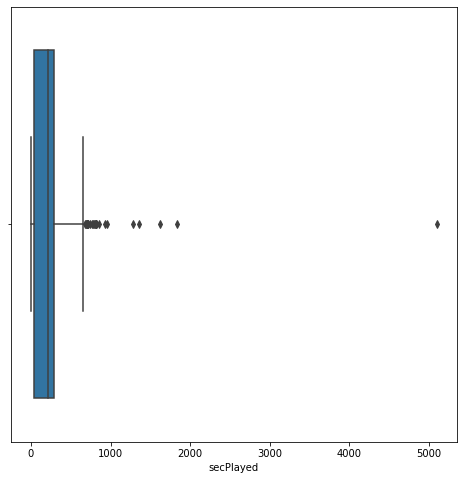

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.boxplot(x='secPlayed', data=songs)

In [20]:
songs[songs['secPlayed'] > 1000]

,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,albumName,secPlayed,duration_s
4843,Duncan Trussell Family Hour,MY MOM,1620664,2020-07-24 08:08:00,0.812,0.880,1,-1.521,1,0.2590,0.295,0.00000,0.1060,0.778,90.098,319867,4,Relapse: Refill,1620.664,319.867
5221,Duncan Trussell Family Hour,MY MOM,1839225,2020-08-01 22:07:00,0.812,0.880,1,-1.521,1,0.2590,0.295,0.00000,0.1060,0.778,90.098,319867,4,Relapse: Refill,1839.225,319.867
12271,Duncan Trussell Family Hour,Dr. Drew!,5103165,2020-12-27 21:01:00,0.816,0.775,11,-3.323,1,0.2340,0.160,0.00031,0.0543,0.527,93.431,270587,4,2001,5103.165,270.587
13301,Gidge,Hon,1360730,2021-01-11 11:47:00,0.614,0.464,9,-8.473,1,0.0803,0.485,0.00000,0.0812,0.293,152.092,195799,4,"NOI, LORO, GLI ALTRI",1360.730,195.799
15190,Renegades: Born in the USA,Race in the United States,1279334,2021-03-02 08:32:00,0.447,0.997,0,-2.348,1,0.3250,0.163,0.00000,0.8840,0.105,134.039,160884,4,The Powers That B,1279.334,160.884


Discovered that there isn't that much of a difference between 60 secs and 30 seconds. When lowering the threshold to 15 seconds was when I could understand a bit more what was happening. 

Songs I listen to for less than 60 seconds are not necessarily outliers simply because sometimes I just listen to a portion of a song before changing but when I listen to music for less than 15 seconds it most likely means I listened to it, didn't like and decided to change. 

Moreover, found *true outliers* with the Duncan Trussell and the Renegades podcasts given that I want my music taste, not podcasts. Will therefore exclude them.

In [25]:
print(f"Dataset before exclusion {len(songs)}")
songs = songs[songs['secPlayed'] > 11]
songs = songs[songs['secPlayed'] < 1000]
print(f"Dataset after exclusion {len(songs)}")

Dataset before exclusion 16268
Dataset after exclusion 13271


## Amount listened every Month

Lets create a variable for **Month**:

In [26]:
songs['month'] = songs.datetime.str.split('-').apply(lambda x: x[1])
songs.head(1)

,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,albumName,secPlayed,duration_s,month
0,Gramophiles,Tamborito - Gramophiles Edit,200273,2020-03-30 18:45:00,0.733,0.908,2,-3.303,1,0.109,...,0.00913,0.209,0.501,105.052,226857,4,Tamborito (Gramophiles Edit),200.273,226.857,03


<AxesSubplot:xlabel='month', ylabel='secPlayed'>

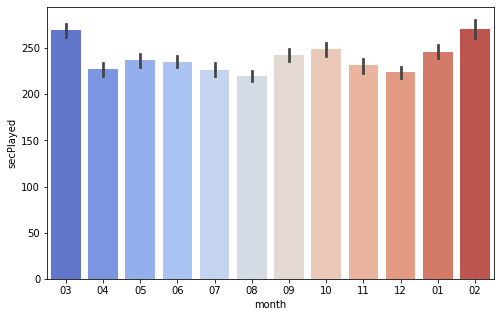

In [28]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x='month', y='secPlayed', data=songs, palette='coolwarm')

In [29]:
print("The graph above depicts the AVERAGE seconds played during each month.")
print("The MEAN of streaming seconds played by month is: ",songs[songs['month'] == '03']['secPlayed'].mean().round(2), "\n")
print("The graph below depicts the SUM seconds played during each month.")
print("The SUM of streaming seconds played by month is: ",songs[songs['month'] == '03']['secPlayed'].sum().round(2))

The graph above depicts the AVERAGE seconds played during each month.
The MEAN of streaming seconds played by month is:  269.82 

The graph below depicts the SUM seconds played during each month.
The SUM of streaming seconds played by month is:  273592.95


<AxesSubplot:xlabel='month'>

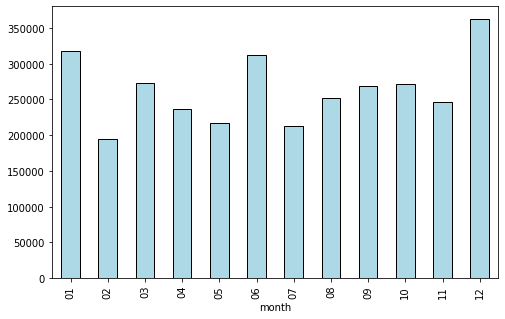

In [32]:
plt.figure(figsize=(8,5))
songs.groupby('month')['secPlayed'].sum().plot(kind='bar', color='lightblue', edgecolor='black')

Not surprisingly, I listened to more music when I had more free time like January, July and December. 

In [33]:
songs.groupby('month').sum()['secPlayed'].argmax() 
# this will return the index of the month with the highest amount of secPlayed

11

## Preparing the dataset for clustering

In [34]:
features = ['danceability', \
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', \
       'instrumentalness', 'liveness', 'valence','tempo','time_signature']

In [35]:
songs[features].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,13271.000000,13271.000000,13271.000000,13271.000000,13271.000000,13271.000000,13271.000000,13271.000000,13271.000000,13271.000000,13271.000000,13271.000000
mean,0.701351,0.582759,5.516766,-9.436006,0.479316,0.083406,0.327363,0.306677,0.169937,0.532200,117.475276,3.937382
std,0.141536,0.193380,3.581120,3.426675,0.499591,0.078750,0.300189,0.359484,0.151738,0.256274,26.004934,0.303827
min,0.000000,0.003760,0.000000,-37.564000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,0.000000
25%,0.629000,0.450000,2.000000,-11.140000,0.000000,0.040800,0.049100,0.000113,0.090400,0.329000,97.947000,4.000000
50%,0.725000,0.591000,6.000000,-9.055000,0.000000,0.054700,0.234000,0.064800,0.111000,0.542000,116.990000,4.000000
75%,0.804000,0.726000,9.000000,-7.205000,1.000000,0.091000,0.565000,0.702000,0.177000,0.743500,127.002000,4.000000
max,0.988000,1.000000,11.000000,-1.514000,1.000000,0.958000,0.995000,0.994000,0.980000,0.984000,212.404000,5.000000


<AxesSubplot:>

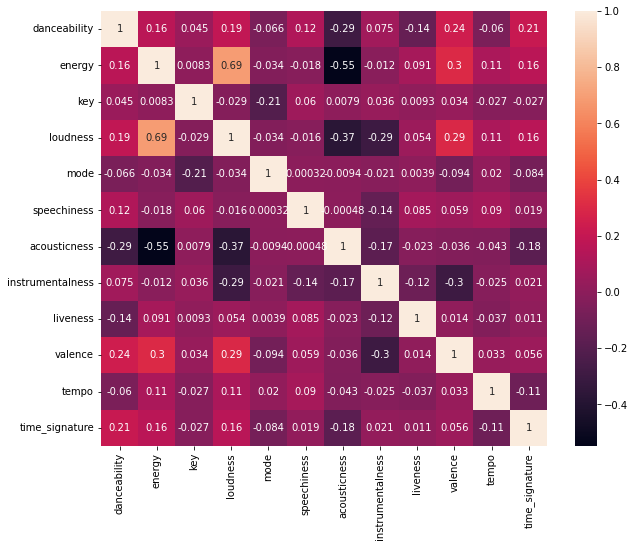

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(songs[features].corr(), annot=True)

It makes sense for acousticness to have a negative correlation to energy and loudness. More notably we can see that there is low correlation among the other features. 

It is clear we have to scale these numerical features in order to be able to compare them:

## Scaling the numerical features and Elbow method

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [38]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', \
       'instrumentalness', 'liveness', 'valence','tempo','time_signature', 'secPlayed']

non_categ_features = ['artistName', 'trackName', 'datetime', 'type', 'id']

Using only numeric variables, will cluster the data after scaling it:

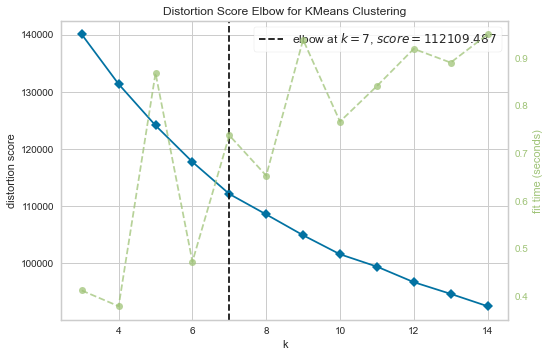

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
from yellowbrick.cluster import KElbowVisualizer

# Scaling features
songs_num = songs[features]
scaler = StandardScaler()
songs_scaled = scaler.fit_transform(songs_num)

model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,15))

visualizer.fit(songs_scaled)
visualizer.show()

The visualizer shows no specific elbow as can be ovserved by the distortion score. Will instatiate KMeans with n=7 clusters to investigate the results:

For n_clusters = 3 The average silhouette_score is : 0.10453406748363622
For n_clusters = 4 The average silhouette_score is : 0.11229294682146147
For n_clusters = 5 The average silhouette_score is : 0.11879365637572421
For n_clusters = 6 The average silhouette_score is : 0.1065803954398023
For n_clusters = 7 The average silhouette_score is : 0.11037120395037314
For n_clusters = 8 The average silhouette_score is : 0.09943877317157296
For n_clusters = 9 The average silhouette_score is : 0.10777666728002046


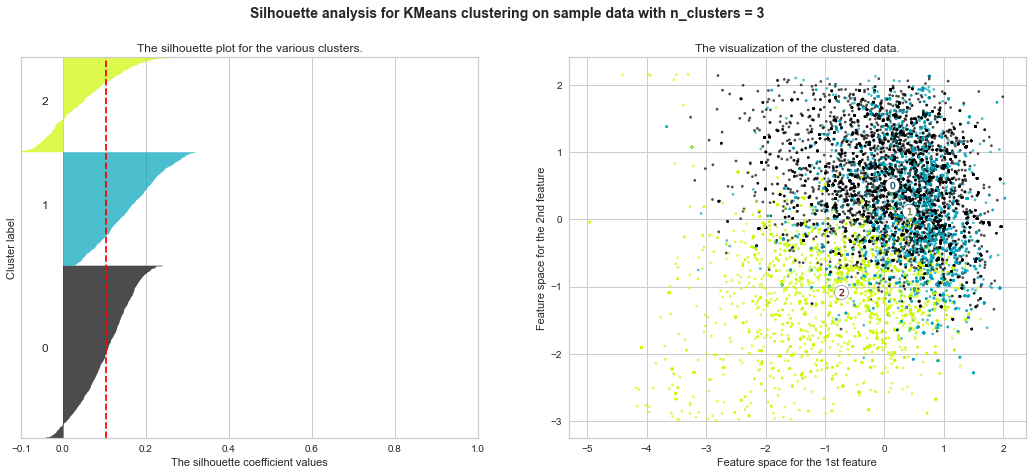

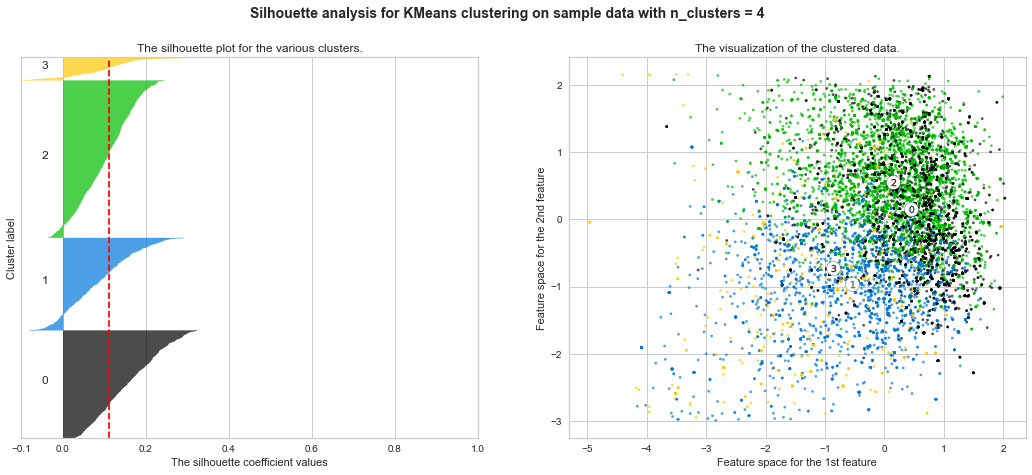

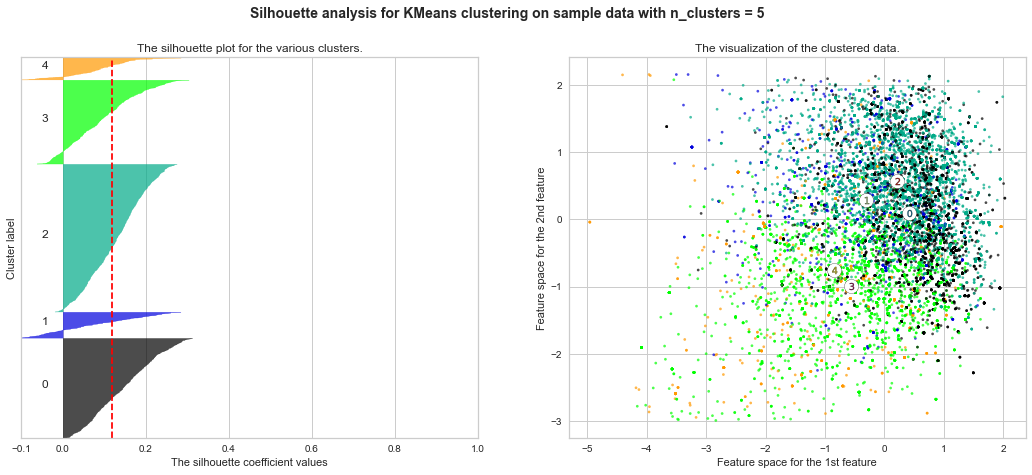

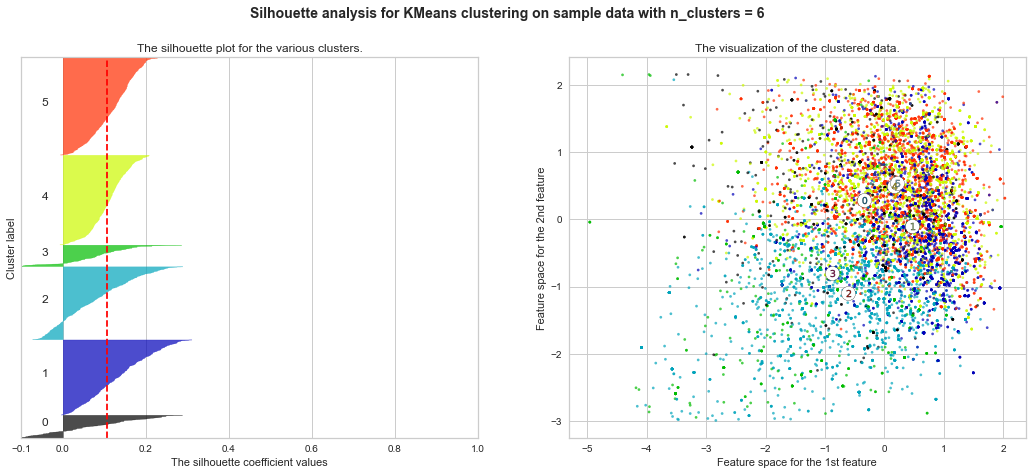

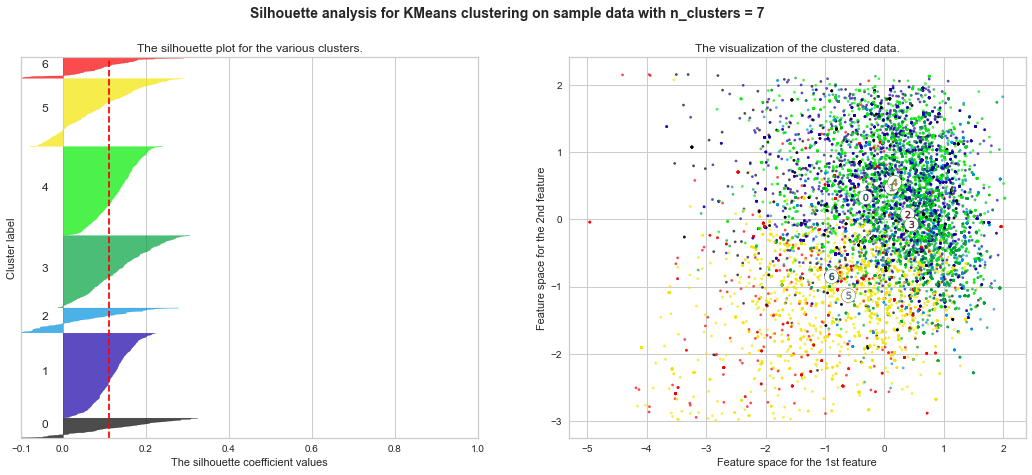

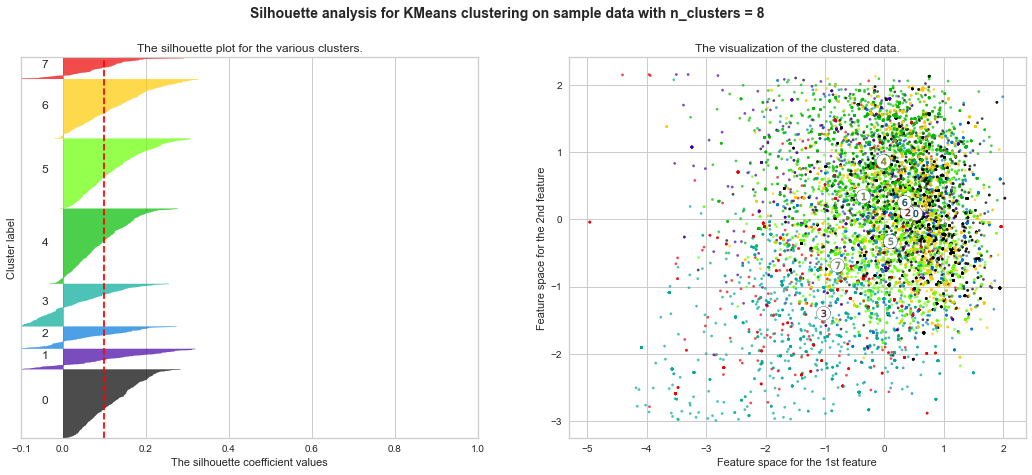

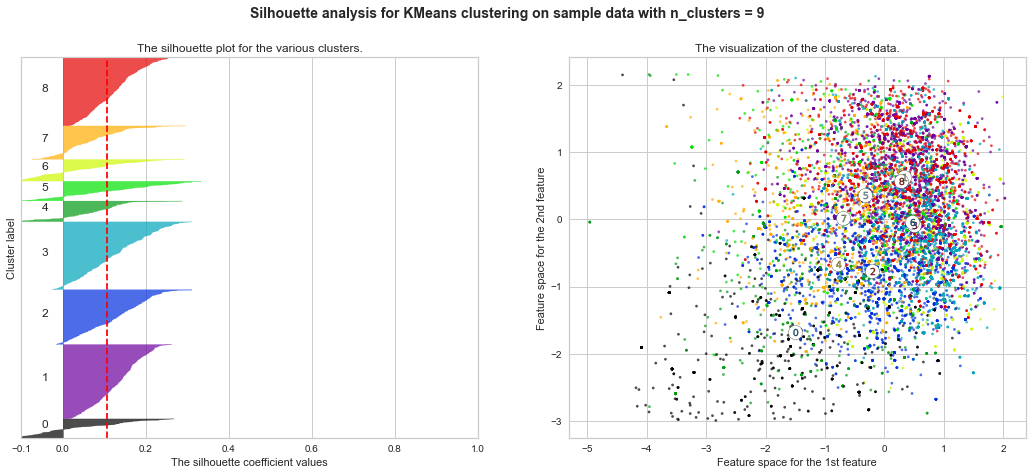

In [42]:
import matplotlib.cm as cm

range_n_clusters = [3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(songs_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(songs_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(songs_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(songs_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        songs_scaled[:, 0], songs_scaled[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [43]:
km = KMeans(n_clusters=6, random_state=506)
km.fit_transform(songs_scaled)
labels = pd.Series(km.labels_)

In [44]:
'''
to_concat = [songs, labels]

songs_km = pd.concat(to_concat, axis=1)
'''

songs['cluster'] = labels

<AxesSubplot:xlabel='danceability', ylabel='energy'>

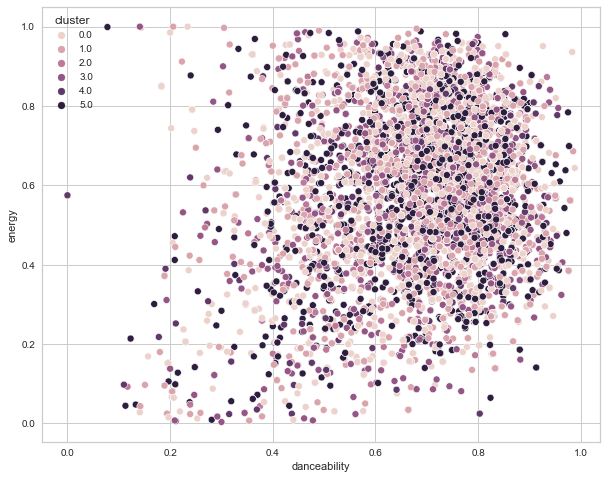

In [45]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='danceability', y='energy', hue='cluster', data=songs)

In [46]:
songs.columns[4:15]

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

## Comparing Clusters visually

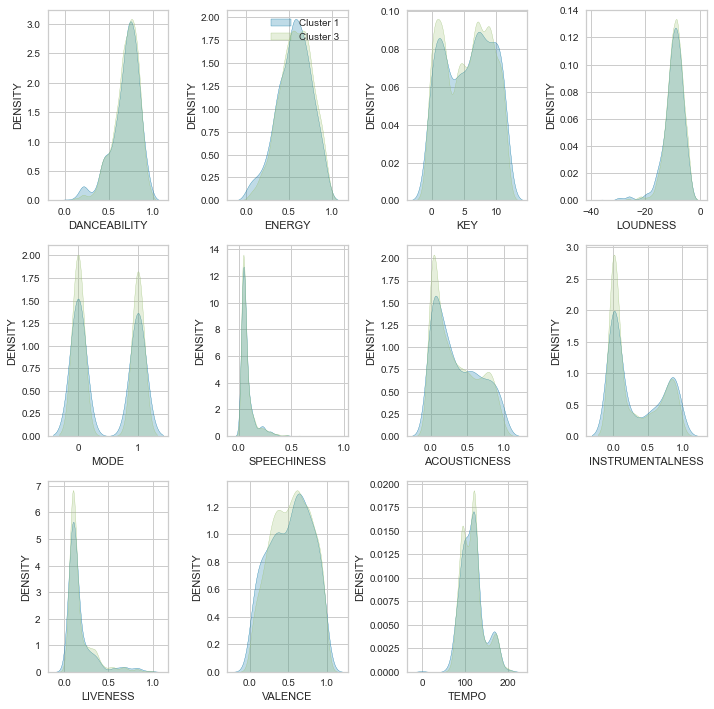

In [49]:
plt.subplots(3,3, figsize=(10,10))
for i, col in enumerate(songs.columns[4:15]):
    plt.subplot(3,4,i+1)
    sns.kdeplot(songs.loc[songs['cluster'] == 4, col], shade=True, label='Cluster 4')
    sns.kdeplot(songs.loc[songs['cluster'] == 5, col], shade=True, label='Cluster 5')

    plt.ylabel('DENSITY')
    plt.xlabel(col.upper())

    if i == 1:
        plt.legend(loc='upper right')
    else:
        plt.legend().remove()

plt.tight_layout()

In [50]:
by_cluster = songs[['cluster', 'artistName', 'trackName']].drop_duplicates(subset=['trackName'])
display(by_cluster[by_cluster['cluster'] == 1].head(10), by_cluster[by_cluster['cluster'] == 3].head(10))

,cluster,artistName,trackName
2,1.0,Rodrigo Gallardo,Ay Que Sera Del Sol - Original
7,1.0,Anderson .Paak,Come Home - Instrumental
16,1.0,El Natty Combo,Mi Sol
19,1.0,Pascuala Ilabaca y Fauna,Ya No Esperes Más
22,1.0,Kalabrese,Is This
29,1.0,Chancha Via Circuito,Sueno en Paraguay
55,1.0,Residente,René
70,1.0,Kermesse,Le Fleur
76,1.0,Di Laif,Paso Por El Fuego (feat. Mafé Tula)
79,1.0,Jorge Drexler,Todo se transforma


,cluster,artistName,trackName
1,3.0,Nelson Faria,Os Cafezais Sem Fim
9,3.0,NAFTA,La Carta
23,3.0,Romare,All Night
28,3.0,Populous,Cru
35,3.0,Quantic,E Ye Ye
43,3.0,Trevor Hall,Indigo
46,3.0,Natalia Doco,Remolino
54,3.0,Sonámbulo,Agua
69,3.0,tulengua,Easy 2 B Hard
80,3.0,Jorge Drexler,Asilo (feat. Mon Laferte)


In [40]:
by_cluster.groupby('cluster')['cluster'].value_counts(ascending=False)

cluster  cluster
0.0      0.0        480
1.0      1.0        512
2.0      2.0        503
3.0      3.0        783
4.0      4.0        770
5.0      5.0        373
6.0      6.0        449
Name: cluster, dtype: int64

Despite testing different combinations of clusters, not one seemed to satisfy the objective of having heterogeneous clusters with homogenous songs in each of these. When comparing distributions of variables between clusters no significant differences were found. 

## Is there a difference between what I listened during the day as opposed to the night?

In [51]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13271 entries, 0 to 16267
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artistName        13271 non-null  object 
 1   trackName         13271 non-null  object 
 2   msPlayed          13271 non-null  int64  
 3   datetime          13271 non-null  object 
 4   danceability      13271 non-null  float64
 5   energy            13271 non-null  float64
 6   key               13271 non-null  int64  
 7   loudness          13271 non-null  float64
 8   mode              13271 non-null  int64  
 9   speechiness       13271 non-null  float64
 10  acousticness      13271 non-null  float64
 11  instrumentalness  13271 non-null  float64
 12  liveness          13271 non-null  float64
 13  valence           13271 non-null  float64
 14  tempo             13271 non-null  float64
 15  duration_ms       13271 non-null  int64  
 16  time_signature    13271 non-null  int64 

In [52]:
songs['datetime'] = pd.to_datetime(songs['datetime'])

In [54]:
def by_time_period(date):

    return int(date.hour)

In [55]:
songs['hour'] = songs['datetime'].apply(by_time_period)
songs.head()

,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,duration_ms,time_signature,albumName,secPlayed,duration_s,month,cluster,hour
0,Gramophiles,Tamborito - Gramophiles Edit,200273,2020-03-30 18:45:00,0.733,0.908,2,-3.303,1,0.1090,...,0.501,105.052,226857,4,Tamborito (Gramophiles Edit),200.273,226.857,03,5.0,18
1,Nelson Faria,Os Cafezais Sem Fim,230874,2020-03-31 11:42:00,0.432,0.307,7,-13.805,0,0.0376,...,0.370,121.541,230875,4,Nelson Faria Convida Wagner Tiso. Um Café Lá E...,230.874,230.875,03,3.0,11
2,Rodrigo Gallardo,Ay Que Sera Del Sol - Original,390222,2020-03-31 11:49:00,0.773,0.532,2,-11.297,1,0.0674,...,0.389,99.993,390223,4,Summer Sol,390.222,390.223,03,1.0,11
3,Iorie,Fool,128739,2020-03-31 11:51:00,0.706,0.604,2,-6.932,1,0.3030,...,0.361,82.030,165029,4,fools (can't help falling in love) (feat. Sody),128.739,165.029,03,5.0,11
4,Rodrigo Gallardo,Ay Que Sera Del Sol - Original,71285,2020-03-31 11:52:00,0.773,0.532,2,-11.297,1,0.0674,...,0.389,99.993,390223,4,Summer Sol,71.285,390.223,03,1.0,11


In [56]:
def assign_interval(hour):

    if hour <= 12:
        return 'Morning'
    elif hour > 17:
        return 'Night'
    else:
        return 'Afternoon'

In [57]:
songs['time_of_day'] = songs['hour'].apply(assign_interval)
songs.head()

,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,mode,speechiness,...,tempo,duration_ms,time_signature,albumName,secPlayed,duration_s,month,cluster,hour,time_of_day
0,Gramophiles,Tamborito - Gramophiles Edit,200273,2020-03-30 18:45:00,0.733,0.908,2,-3.303,1,0.1090,...,105.052,226857,4,Tamborito (Gramophiles Edit),200.273,226.857,03,5.0,18,Night
1,Nelson Faria,Os Cafezais Sem Fim,230874,2020-03-31 11:42:00,0.432,0.307,7,-13.805,0,0.0376,...,121.541,230875,4,Nelson Faria Convida Wagner Tiso. Um Café Lá E...,230.874,230.875,03,3.0,11,Morning
2,Rodrigo Gallardo,Ay Que Sera Del Sol - Original,390222,2020-03-31 11:49:00,0.773,0.532,2,-11.297,1,0.0674,...,99.993,390223,4,Summer Sol,390.222,390.223,03,1.0,11,Morning
3,Iorie,Fool,128739,2020-03-31 11:51:00,0.706,0.604,2,-6.932,1,0.3030,...,82.030,165029,4,fools (can't help falling in love) (feat. Sody),128.739,165.029,03,5.0,11,Morning
4,Rodrigo Gallardo,Ay Que Sera Del Sol - Original,71285,2020-03-31 11:52:00,0.773,0.532,2,-11.297,1,0.0674,...,99.993,390223,4,Summer Sol,71.285,390.223,03,1.0,11,Morning


In [58]:
songs.value_counts('time_of_day')

time_of_day
Morning      5316
Night        4042
Afternoon    3913
dtype: int64

In [74]:
morning = songs[songs['time_of_day'] == 'Morning']

gr_morn = morning.groupby('artistName')['msPlayed'].sum().sort_values(ascending=False).head(10) # Top 10 most heard artists in the morning
gr_morn

artistName
El Kanka              52538757
Jorge Drexler         37249774
Natalia Lafourcade    19112358
Matanza               18597219
Afterclapp            16796663
Señor Loop            16633503
Nicola Cruz           14562756
Cultura Profética     13591777
Stavroz               12923231
Polo & Pan            12826984
Name: msPlayed, dtype: int64

In [75]:
afternoon = songs[songs['time_of_day'] == 'Afternoon']

gr_after = afternoon.groupby('artistName')['msPlayed'].sum().sort_values(ascending=False).head(10) # Top 10 most heard artists in the afternoon
gr_after

artistName
El Kanka              27080001
Jorge Drexler         18076396
Nicola Cruz           15193628
Natalia Lafourcade    14573493
Polo & Pan            12833250
NTO                   11642743
Señor Loop            10543894
Matanza                9328262
Cultura Profética      8570843
Quantic                7680959
Name: msPlayed, dtype: int64

In [71]:
night = songs[songs['time_of_day'] == 'Night']

gr_night = afternoon.groupby('artistName')['msPlayed'].sum().sort_values(ascending=False).head(10) # Top 10 most heard artists in the night
gr_night

artistName
El Kanka              27080001
Jorge Drexler         18076396
Nicola Cruz           15193628
Natalia Lafourcade    14573493
Polo & Pan            12833250
NTO                   11642743
Señor Loop            10543894
Matanza                9328262
Cultura Profética      8570843
Quantic                7680959
Name: msPlayed, dtype: int64

Seems like I do not discriminate by time of day to listen to certain songs. This analysis into the time of day could go more in depth into the time-of-day streaming behavior. 